In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
PATH_TO_GRAPH = r'models/udacity_sim/8_batch/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [5]:
IMAGE_SIZE = (12, 8)

SCORES
[0.55804425 0.37146872 0.214803   0.03590964 0.03181299 0.02864137
 0.02678437 0.02636612 0.02145804 0.02063765]
CLASSES
[2. 2. 2. 1. 4. 1. 4. 2. 1. 1.]


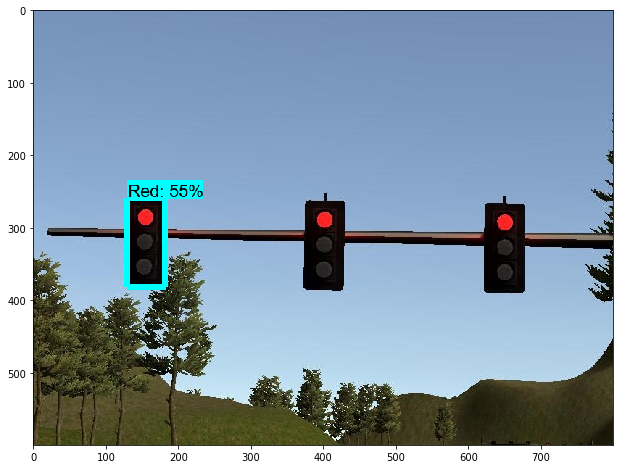

SCORES
[0.9854982  0.9791966  0.97653985 0.03319598 0.01843747 0.01743577
 0.01704962 0.01620689 0.0157043  0.01480425]
CLASSES
[1. 1. 1. 1. 3. 4. 4. 1. 4. 2.]


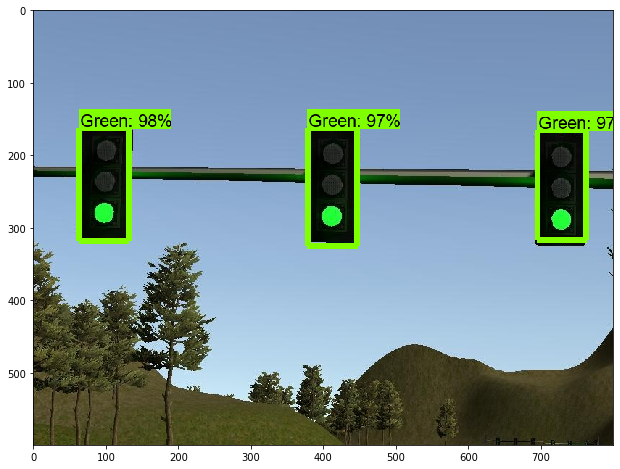

SCORES
[0.98701596 0.9660663  0.959643   0.0228473  0.01869502 0.01651765
 0.01627677 0.01558314 0.01443649 0.01435936]
CLASSES
[1. 1. 1. 1. 1. 4. 4. 2. 4. 4.]


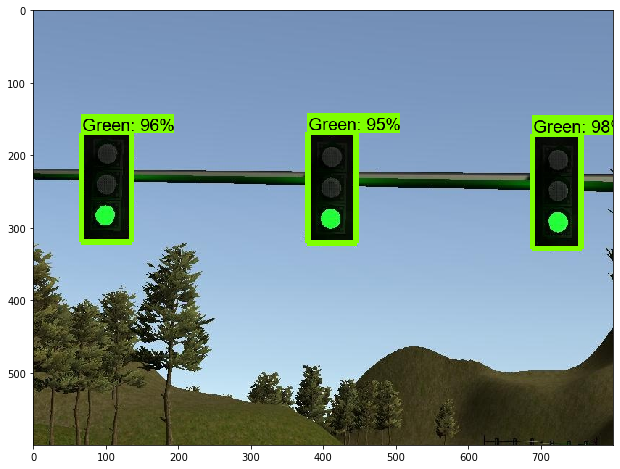

SCORES
[0.9748423  0.89321584 0.7523246  0.04737611 0.04039761 0.03513721
 0.02995435 0.02965028 0.02758406 0.02749556]
CLASSES
[1. 1. 1. 2. 2. 3. 2. 3. 3. 2.]


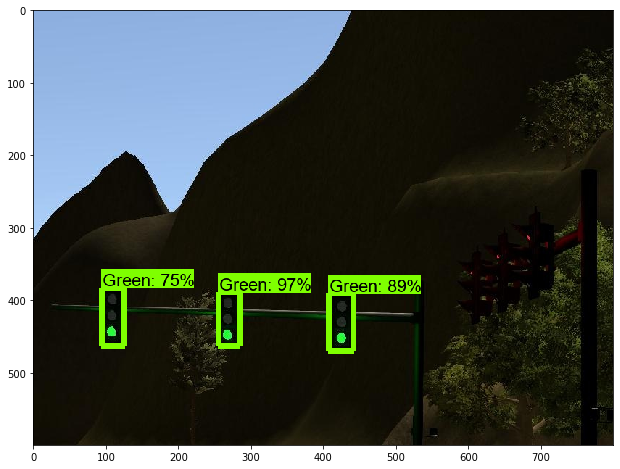

SCORES
[0.81369185 0.5169068  0.37289244 0.04955463 0.02378701 0.02224198
 0.02211705 0.02133573 0.02130117 0.02081177]
CLASSES
[2. 2. 2. 3. 1. 4. 1. 3. 1. 3.]


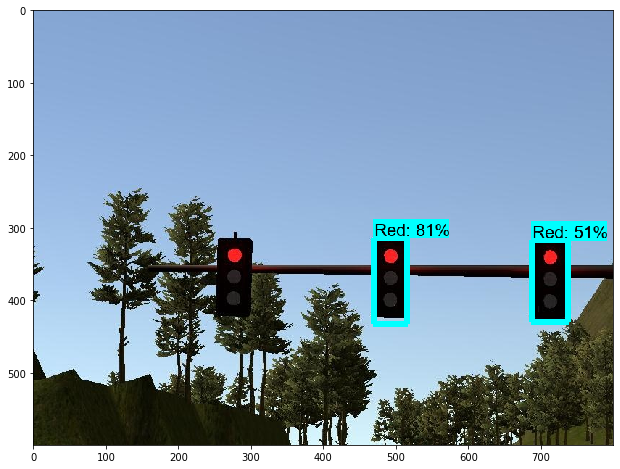

SCORES
[0.9096184  0.9064812  0.59807307 0.05557801 0.05312994 0.03904253
 0.03723641 0.03339661 0.0289063  0.02802175]
CLASSES
[3. 3. 3. 1. 1. 1. 1. 1. 1. 4.]


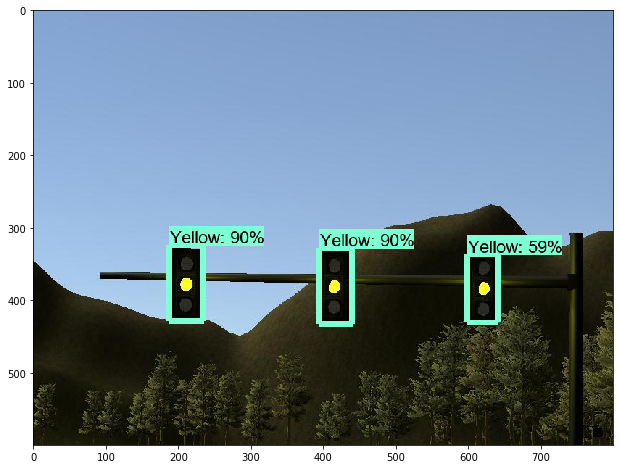

SCORES
[0.02191327 0.02019394 0.02003726 0.01988852 0.01979896 0.0192486
 0.01917258 0.01881345 0.01843148 0.01798139]
CLASSES
[4. 1. 4. 3. 2. 1. 1. 1. 4. 3.]


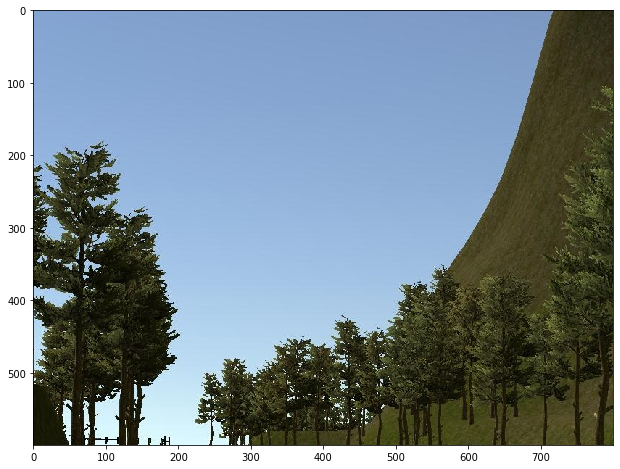

SCORES
[0.9474191  0.9306269  0.79703367 0.03755354 0.03576171 0.03551656
 0.03309673 0.03257862 0.03010746 0.02926637]
CLASSES
[2. 2. 2. 2. 1. 4. 2. 3. 4. 3.]


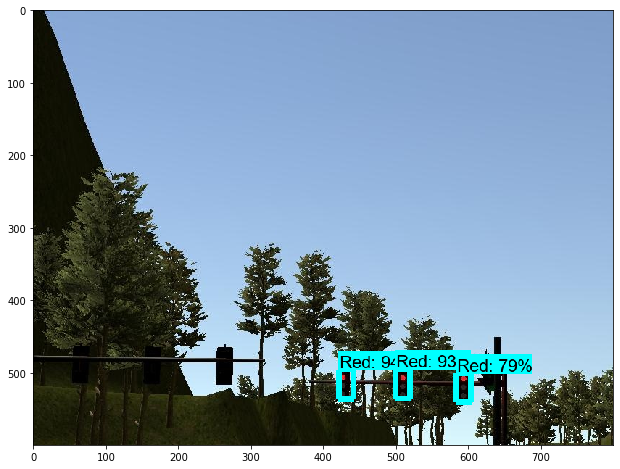

SCORES
[0.02900554 0.02876544 0.02536525 0.02273445 0.0222032  0.02214612
 0.02191313 0.02128902 0.02045788 0.0203025 ]
CLASSES
[1. 1. 1. 4. 1. 4. 3. 3. 2. 3.]


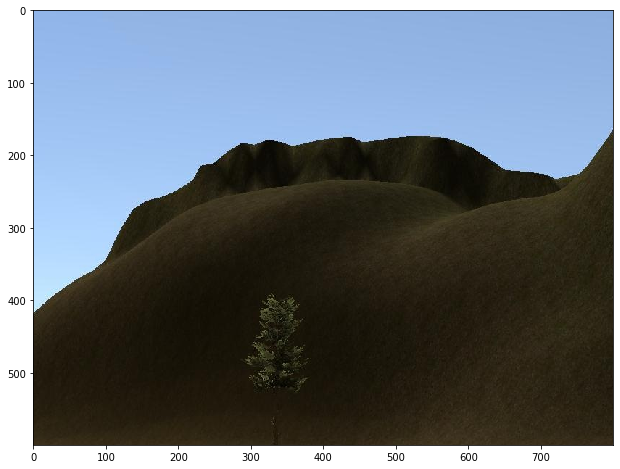

SCORES
[0.15342548 0.14914152 0.10529877 0.08378091 0.04829051 0.03571853
 0.03211682 0.02870984 0.02855879 0.02725227]
CLASSES
[3. 3. 1. 3. 1. 3. 3. 1. 2. 3.]


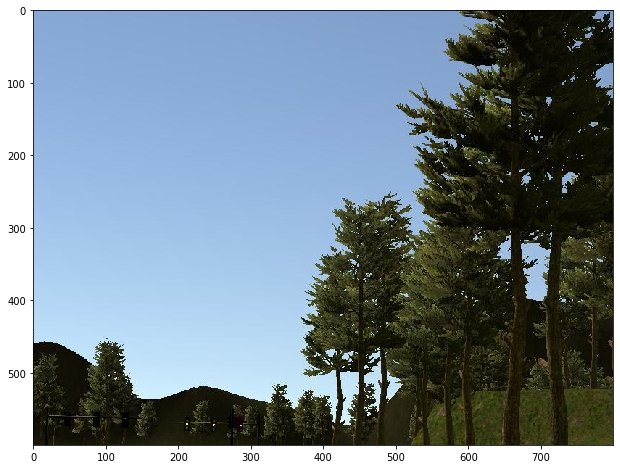

SCORES
[0.9392998  0.91777194 0.90120983 0.01679302 0.01626068 0.0162248
 0.01618101 0.01548857 0.01523533 0.01493603]
CLASSES
[1. 1. 1. 3. 1. 4. 4. 4. 3. 4.]


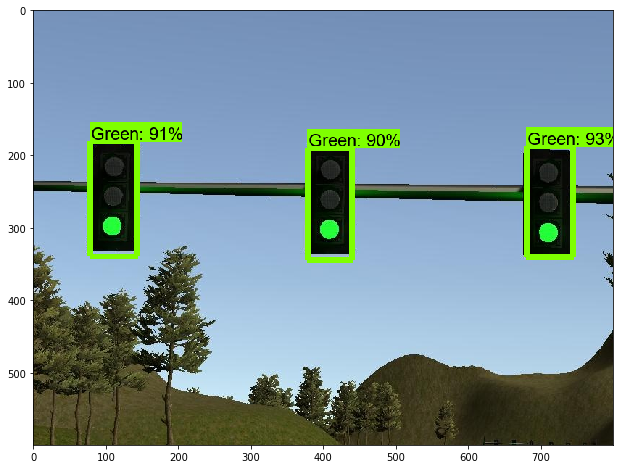

In [6]:
PATH_TO_IMGS = r'data/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break